In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
train=pd.read_csv('E:\\Datascience\\Datasets\\satander-customer-satisfaction\\train.csv',nrows=5000)
test=pd.read_csv('E:\\Datascience\\Datasets\\satander-customer-satisfaction\\test.csv',nrows=5000)

In [82]:
len(train)

5000

In [83]:
df=pd.concat((train,test))

C:\Users\Shari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
df.head()

,ID,TARGET,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,...,saldo_var44,saldo_var46,saldo_var5,saldo_var6,saldo_var8,var15,var21,var3,var36,var38
0,1,0.0,0,0,0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.0,23,0,2,99,39205.170000
1,3,0.0,0,0,-1,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.0,34,0,2,3,49278.030000
2,4,0.0,0,0,0,0.0,0.0,0.0,0,0,...,0.0,0,3.00,0.0,0.0,23,0,2,99,67333.770000
3,8,0.0,0,0,0,0.0,0.0,0.0,0,0,...,0.0,0,70.62,0.0,0.0,37,0,2,2,64007.970000
4,10,0.0,0,0,0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.0,39,0,2,1,117310.979016


In [85]:
X=df.drop('TARGET',axis=1)
y=df['TARGET']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [88]:
len(X_train)

7000

In [89]:
len(y_train)

7000

In [90]:
len(X_test)

3000

In [91]:
X_train.shape

(7000, 370)

In [92]:
corX=X_train.corr()

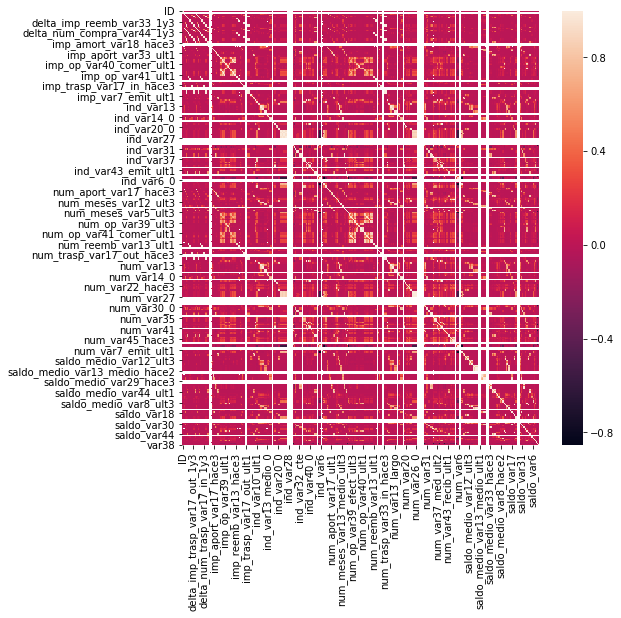

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(corX)

In [94]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [95]:
corr_features=correlation(X_train,0.8)

In [96]:
len(set(corr_features))

186

In [97]:
corr_features

{'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_hace3',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo_0',
 'ind_var17_0',
 'ind_var20_0',
 'ind_var24',
 'ind_var24_0',
 'ind_var25_0',
 'i

In [98]:
X_train=X_train.drop(corr_features,axis=1)
